In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import pandas as pd
from lc_lmfit import *

In [2]:
folder='afterglow_data/'
filename='_xray_batxrt.txt'

GRBs=['050724', '051227', '060614', '061006', '061210', '070714B', '071227', '080123', '080503', '111121A', '150424A', '211211A', '211227A']

In [3]:
def make_subplot(i, best_fit, start_index, end_index, fig, n=2):
    ax1 = fig.add_subplot(5,3, i+1)
    time,time_high,time_low,flux,flux_high,flux_low =get_individual_curves_log(folder+GRBs[i]+filename)
    x = np.geomspace(time[start_index],time[end_index],100)
    
    if n == 1:
        y = power_law(x, best_fit["alpha_1"], best_fit["amplitude"])
    else:
        tbreaks = [best_fit["tb"+str(i)] for i in range(n-1)]
        alphas = [best_fit["alpha_"+str(i)] for i in range(n)]
        y = nbroken_law(x,tbreaks, alphas, best_fit["amplitude"])
        print(x.shape, y.shape)


    ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high], markersize=5, label='data', color='green')
    ax1.loglog(x, y,label ='best fit', color='red', zorder=10)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=12.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=12.)
    ax1.set_title("GRB " +GRBs[i],fontsize=10)
    plt.subplots_adjust(hspace=0.5)
    return time[start_index], time_high[start_index]

(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)


/var/folders/zj/ss0wvd7s3nxb2kdbh6g0gccw0000gn/T/ipykernel_7744/2011844136.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)
/var/folders/zj/ss0wvd7s3nxb2kdbh6g0gccw0000gn/T/ipykernel_7744/2011844136.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)


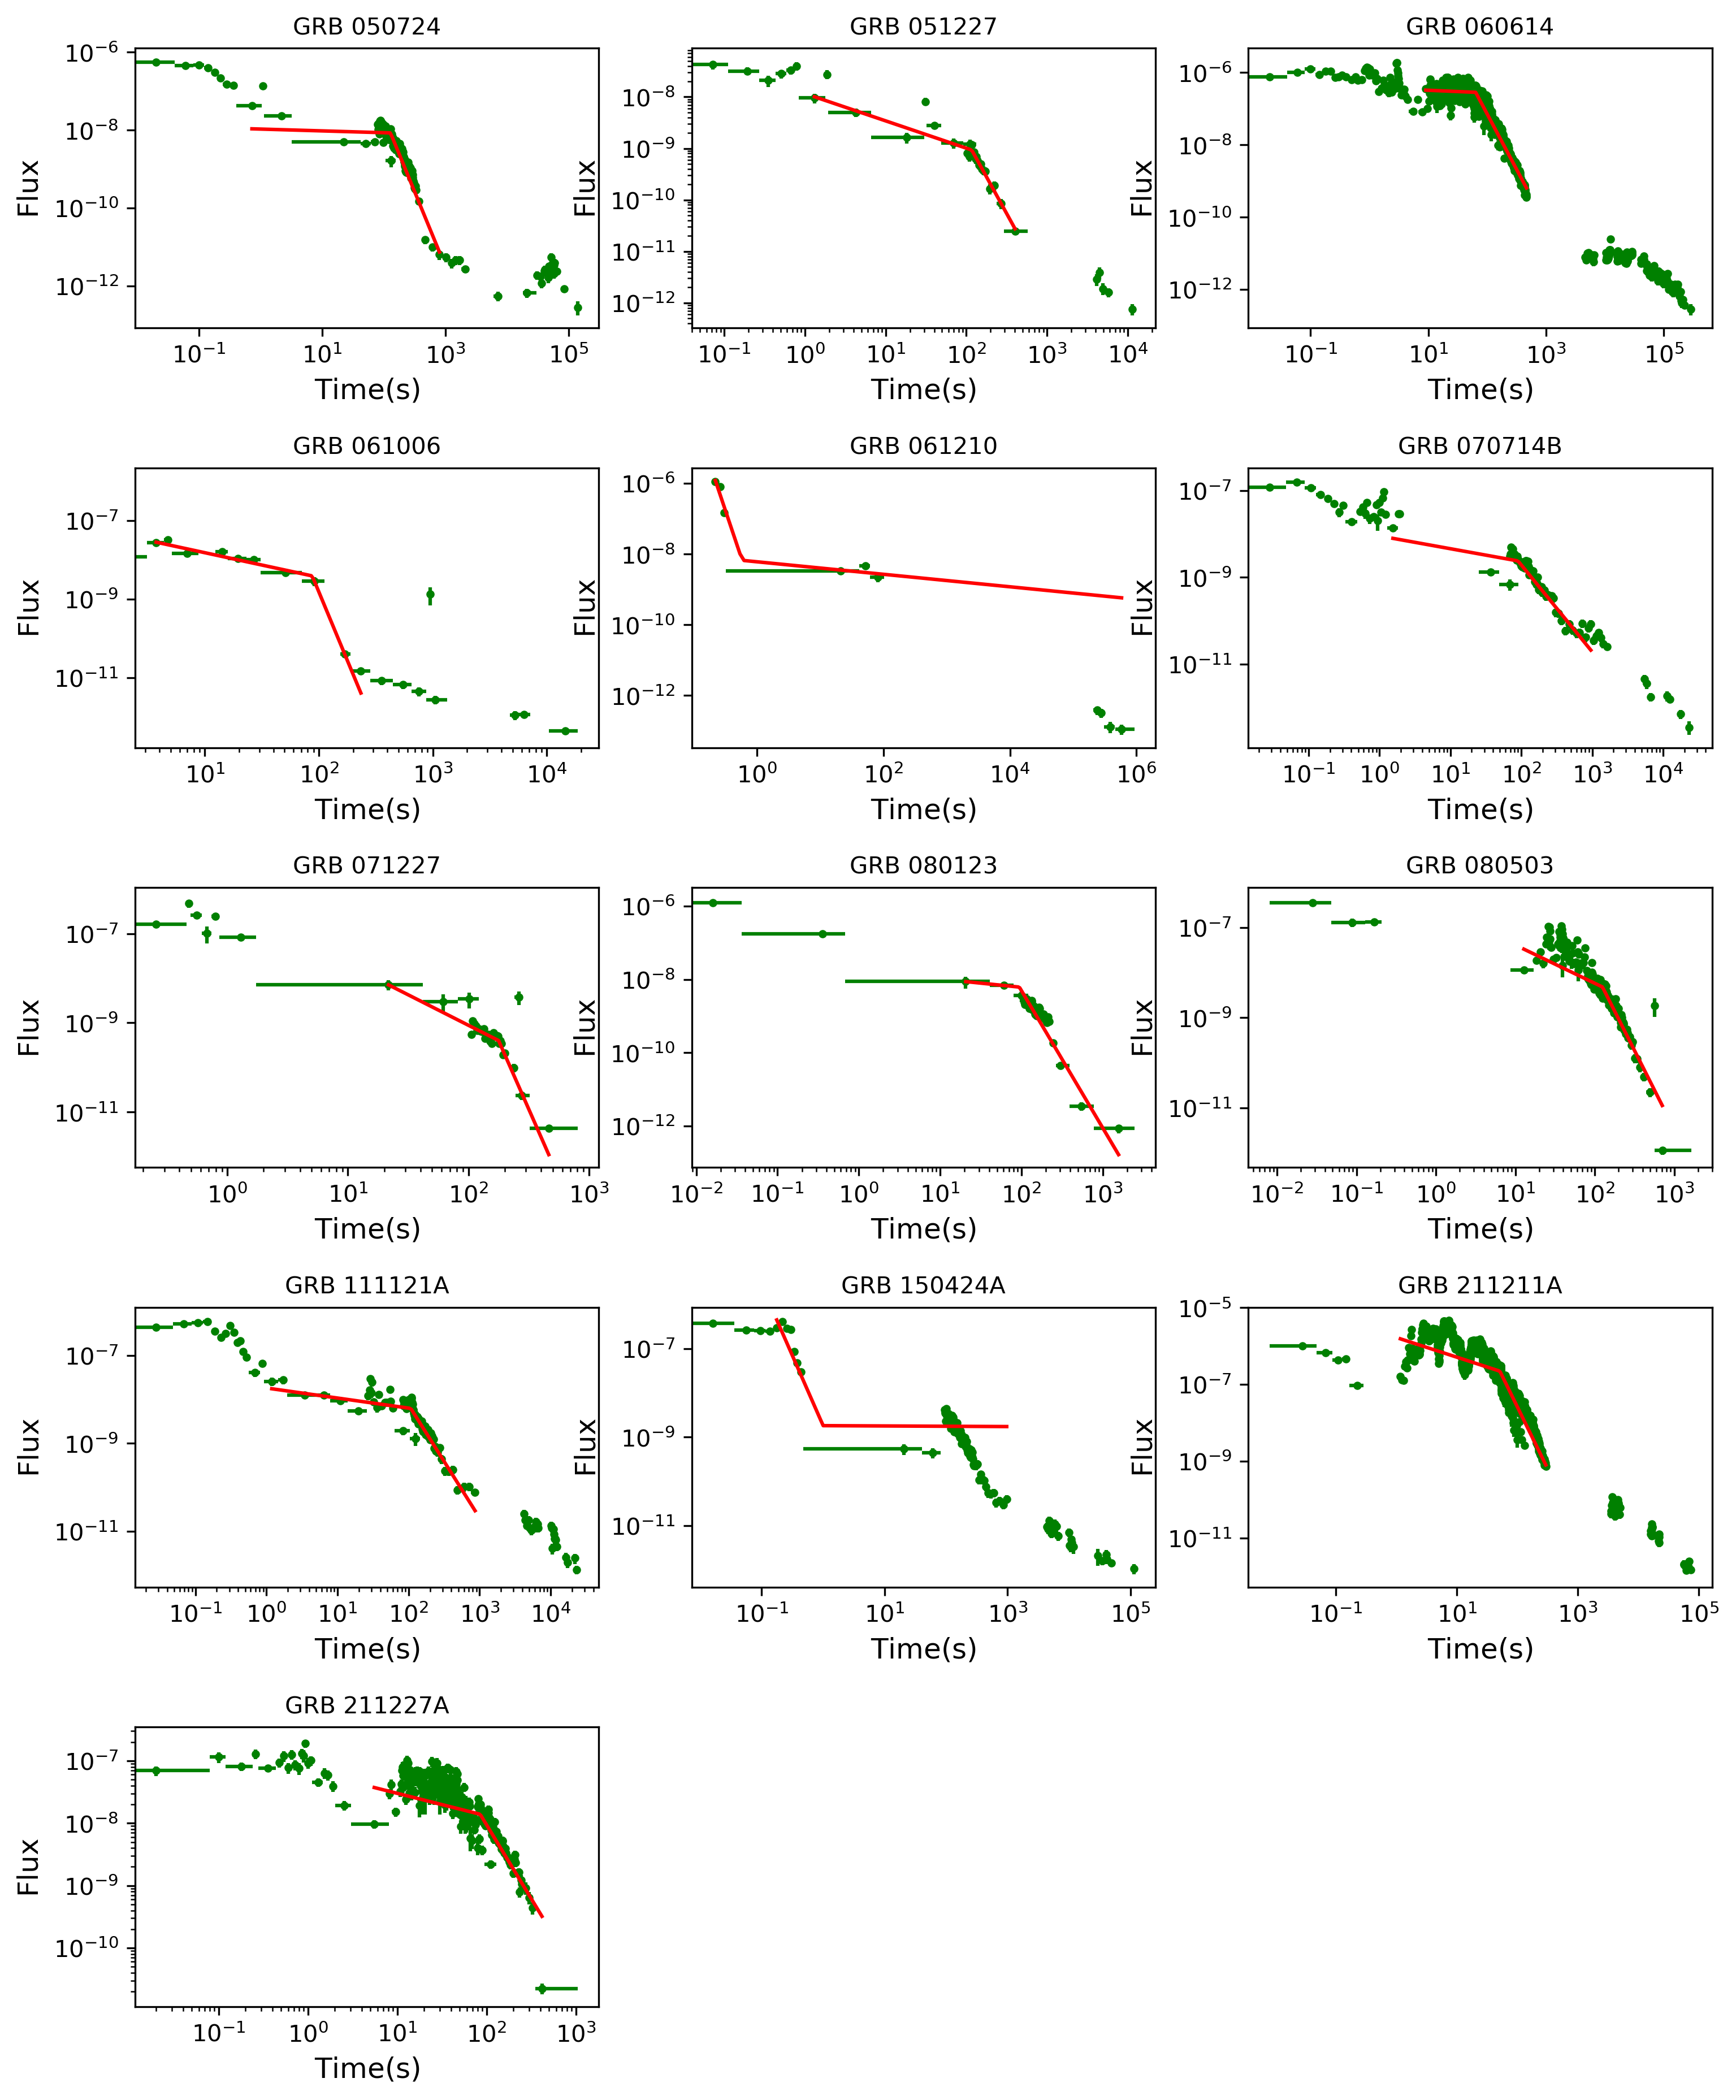

In [4]:
fig=plt.figure(figsize=(12.0,15.0), dpi=300)
fig.patch.set_facecolor('white')
df_bfit = pd.DataFrame(columns=['GRB', "time_ee_start",'tb0', 'tb1', 'alpha_0', 'alpha_1', 'alpha_2', 'amplitude', 'tb0_err', 'tb1_err', 'alpha_0_err', 'alpha_1_err', 'amplitude_err'])


##########################################################################################
i=0

ee_start_index =  9
fit_end_index =  223
best_fit = {'tb0': 128.13007867706798, 'alpha_0': 0.04665183798697275, 'alpha_1': 3.850089298944878, 'amplitude': 8.479490431626053e-09}
errors = {'tb0_err': 2.2002808330965866, 'alpha_0_err': 0.10354082747522594, 'alpha_1_err': 0.09456710784852142, 'amplitude_err': 4.028899700172901e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)



##########################################################################################
i=1

ee_start_index =  7
fit_end_index =  32
best_fit = {'tb0': 116.85473780706344, 'alpha_0': 0.5303992540189975, 'alpha_1': 2.849855059970377, 'amplitude': 9.304062073801234e-10}
errors = {'tb0_err': 9.561521781615632, 'alpha_0_err': 0.06501472712655423, 'alpha_1_err': 0.41515634958218023, 'amplitude_err': 1.4653125807954882e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)



##########################################################################################
i = 2

ee_start_index =  86
fit_end_index =  1844
best_fit = {'tb0': 63.62081186910026, 'alpha_0': 0.07030875544069666, 'alpha_1': 3.066570409242523, 'amplitude': 2.8426741318281203e-07}
errors = {'tb0_err': 0.5904878727772693, 'alpha_0_err': 0.03351141892624369, 'alpha_1_err': 0.019889248331232522, 'amplitude_err': 5.5173761288987655e-09}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 3

ee_start_index =  26
fit_end_index =  35
best_fit = {'tb0': 87.49503324416187, 'alpha_0': 0.6277564996758729, 'alpha_1': 6.987282165729049, 'amplitude': 3.8888060885098015e-09}
errors = {'tb0_err': 5.713097368262697, 'alpha_0_err': 0.09615013737630361, 'alpha_1_err': 0.7262866452392431, 'amplitude_err': 8.886626231113231e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 4

# ee_start_index =  3
# fit_end_index =  9
# best_fit = {'alpha_1': 1.0159367174781455, 'amplitude': 8.901011473809321e-08}
# make_subplot(i, best_fit, ee_start_index, fit_end_index, fig, n=1)

ee_start_index =  0
fit_end_index =  9
best_fit = {'tb0': 0.5836407289746429, 'tb1': 99.99999999999979, 'alpha_0': 5.325971326934093, 'alpha_1': 0.1767122521113937, 'alpha_2': 1.1651098501270394, 'amplitude': 6.618473544957354e-09}
errors = {'tb0_err': 0.39105466797872046, 'tb1_err': 2997.6518348889126, 'alpha_0_err': 1.5778128487728165, 'alpha_1_err': 0.7458044607847443, 'alpha_2_err': 3.677883690355632, 'amplitude_err': 2.1486228435268508e-08}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 5

ee_start_index =  36
fit_end_index =  104
best_fit = {'tb0': 89.99999999999999, 'alpha_0': 0.29481421191014084, 'alpha_1': 2.000890873037125, 'amplitude': 2.3766163819874057e-09}
errors = {'tb0_err': 7.400505697098067, 'alpha_0_err': 0.12511900533509038, 'alpha_1_err': 0.11560900555869719, 'amplitude_err': 2.7951023307243323e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 6

ee_start_index =  8
fit_end_index =  38
best_fit = {'tb0': 177.93999970028844, 'alpha_0': 1.3659761658726053, 'alpha_1': 6.137448207842303, 'amplitude': 4.016362385098296e-10}
errors = {'tb0_err': 5.85911311090957, 'alpha_0_err': 0.17199033546672213, 'alpha_1_err': 0.726135735649262, 'amplitude_err': 4.2276085671660134e-11}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 7

ee_start_index =  2
fit_end_index =  53
best_fit = {'tb0': 94.42181875963081, 'alpha_0': 0.22662013105832948, 'alpha_1': 3.7441371699326083, 'amplitude': 6.1560406953494545e-09}
errors = {'tb0_err': 23.031115839010035, 'alpha_0_err': 0.9866864079088778, 'alpha_1_err': 0.16559307027676495, 'amplitude_err': 5.586554652752015e-09}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 8

ee_start_index =  3
fit_end_index =  216
best_fit = {'tb0': 125.044411166184, 'alpha_0': 0.8494100819374232, 'alpha_1': 3.498183554660461, 'amplitude': 4.82998321558483e-09}
errors = {'tb0_err': 3.5603652599688775, 'alpha_0_err': 0.06351453126780247, 'alpha_1_err': 0.1317328672225662, 'amplitude_err': 3.0351412135706664e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 9

ee_start_index =  21
fit_end_index =  130
best_fit = {'tb0': 107.52544440771089, 'alpha_0': 0.22833453922312497, 'alpha_1': 2.570551321940264, 'amplitude': 6.2264534762917286e-09}
errors = {'tb0_err': 4.261514754288354, 'alpha_0_err': 0.0565835726653627, 'alpha_1_err': 0.12321760869030261, 'amplitude_err': 4.404111219050147e-10}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 10

ee_start_index =  6
fit_end_index =  106
best_fit = {'tb0': 0.9999999999999999, 'tb1': 142.5721131602082, 'alpha_0': 3.1639001243387463, 'alpha_1': 0.006806502807820101, 'alpha_2': 2.6524728037513774, 'amplitude': 1.8191486219204385e-09}
errors = {'tb0_err': 0.2756578742501138, 'tb1_err': 8.18617087790964, 'alpha_0_err': 0.3854470147682117, 'alpha_1_err': 0.13616515150275496, 'alpha_2_err': 0.19764487200789363, 'amplitude_err': 1.1170212765075066e-09}


time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 11

ee_start_index =  5
fit_end_index =  2006
best_fit = {'tb0': 51.38739407414974, 'alpha_0': 0.5130516056816232, 'alpha_1': 3.220770732028166, 'amplitude': 2.22174544187325e-07}
errors = {'tb0_err': 0.8908282325322343, 'alpha_0_err': 0.01615724383000749, 'alpha_1_err': 0.07513325763924535, 'amplitude_err': 7.832480012117496e-09}

time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


##########################################################################################
i = 12

ee_start_index =  21
fit_end_index =  371
best_fit = {'tb0': 85.00000000000001, 'alpha_0': 0.3614284001124204, 'alpha_1': 2.366470142082996, 'amplitude': 1.390426015881884e-08}
errors = {'tb0_err': 4.386690193315028, 'alpha_0_err': 0.04855610604016308, 'alpha_1_err': 0.16102992159125357, 'amplitude_err': 1.0532097928037002e-09}


time_ee_start, time_ee_start_error = make_subplot(i, best_fit, ee_start_index, fit_end_index, fig)

best_fit.update(errors)
best_fit.update({'GRB':GRBs[i]})
best_fit.update({"time_ee_start":time_ee_start})
best_fit.update({"time_ee_start_error":time_ee_start_error})
df_bfit= pd.concat([df_bfit, pd.DataFrame([best_fit])], ignore_index=True)


In [6]:
df_bfit.to_csv("eegrb_fit_parameters.csv", index=False)
df_bfit


,GRB,time_ee_start,tb0,tb1,alpha_0,alpha_1,alpha_2,amplitude,tb0_err,tb1_err,alpha_0_err,alpha_1_err,amplitude_err,time_ee_start_error,alpha_2_err
0,050724,0.720,128.130079,NaN,0.046652,3.850089,NaN,8.479490e-09,2.200281,NaN,0.103541,0.094567,4.028900e-10,0.32,NaN
1,051227,1.312,116.854738,NaN,0.530399,2.849855,NaN,9.304062e-10,9.561522,NaN,0.065015,0.415156,1.465313e-10,0.48,NaN
2,060614,9.060,63.620812,NaN,0.070309,3.066570,NaN,2.842674e-07,0.590488,NaN,0.033511,0.019889,5.517376e-09,0.06,NaN
3,061006,3.740,87.495033,NaN,0.627756,6.987282,NaN,3.888806e-09,5.713097,NaN,0.096150,0.726287,8.886626e-10,0.62,NaN
4,061210,0.220,0.583641,100.000000,5.325971,0.176712,1.165110,6.618474e-09,0.391055,2997.651835,1.577813,0.745804,2.148623e-08,0.02,3.677884
5,070714B,1.548,90.000000,NaN,0.294814,2.000891,NaN,2.376616e-09,7.400506,NaN,0.125119,0.115609,2.795102e-10,0.26,NaN
6,071227,21.736,177.940000,NaN,1.365976,6.137448,NaN,4.016362e-10,5.859113,NaN,0.171990,0.726136,4.227609e-11,20.00,NaN
7,080123,20.696,94.421819,NaN,0.226620,3.744137,NaN,6.156041e-09,23.031116,NaN,0.986686,0.165593,5.586555e-09,20.02,NaN
8,080503,12.808,125.044411,NaN,0.849410,3.498184,NaN,4.829983e-09,3.560365,NaN,0.063515,0.131733,3.035141e-10,4.20,NaN
9,111121A,1.188,107.525444,NaN,0.228335,2.570551,NaN,6.226453e-09,4.261515,NaN,0.056584,0.123218,4.404111e-10,0.26,NaN
